In [5]:
#Udai Nagpal, Jin Woo Won
# -----------Part 5(iv)------------
import numpy as np
import math
from numpy import linalg as LA

def sigmoid(x):
    '''Element by element sigmoid of column vector'''
    return 1.0 / (1.0 + np.exp(-x))

def sigmoid_deriv(x):
    '''Element by element sigmoid derivative of column vector'''
    return sigmoid(x) * (1 - sigmoid(x))

y = np.array([[1],[2],[-1],[-3]])
print(sigmoid(y))
print(sigmoid_deriv(y))

[[0.73105858]
 [0.88079708]
 [0.26894142]
 [0.04742587]]
[[0.19661193]
 [0.10499359]
 [0.19661193]
 [0.04517666]]


In [2]:
def stochastic_gradient_descent (input_data, output_data, inter_layer_sizes, convergence_cutoff=0.00001, max_iterations=50, minibatch_size=25, learning_rate=0.2):
    layer_sizes = [len(input_data[0])] + inter_layer_sizes + [len(output_data[0])]
    num_layers = len(layer_sizes)
    #Random Initialization
    W = [np.random.uniform(low=-2.0, high=2.0, size=(layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)]
    dW = [[np.zeros((layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)] for j in range(minibatch_size)]
    b = [np.random.uniform(low=-2.0, high=2.0, size=(layer_sizes[i+1],)) for i in range(num_layers-1)]
    db = [[np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)] for j in range(minibatch_size)]
    abs_adjustments_W = [100*np.ones((layer_sizes[i],layer_sizes[i+1])) for i in range(num_layers-1)]
    abs_adjustments_b = [100*np.ones((layer_sizes[i+1],)) for i in range(len(layer_sizes)-1)]
    #print('W:' + str(W))
    #print('b:' + str(b))
    elapsed_iterations = 0
    max_adjustment_W, max_adjustment_b = 100, 100
    while(elapsed_iterations<max_iterations and max_adjustment_W>=convergence_cutoff and max_adjustment_b>=convergence_cutoff):
        stochastic_sample = np.random.choice(a=len(output_data),size=minibatch_size, replace=False)
        sample_inputs = [input_data[i] for i in stochastic_sample]
        sample_outputs = [output_data[i] for i in stochastic_sample]
        dW_sum = [np.zeros((layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)]
        db_sum = [np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)]
        sample_predictions = []
        running_cost = 0
        for sample in range(len(sample_outputs)):
            x = sample_inputs[sample]
            y = sample_outputs[sample]
            #print('sample input: ' + str(x))
            #print('sample output: ' + str(y))
            saved_forward_pass = [x]
            layer_input = x
            #Forward Pass
            for layer in range(num_layers-1):
                layer_output = np.add(np.dot(np.transpose(W[layer]), layer_input),b[layer])
                out_dim = layer_output.shape[0]
                layer_input = sigmoid(np.reshape(layer_output, (out_dim,1)))
                layer_input = np.hstack(layer_input)
                saved_forward_pass.append(layer_input)
            sample_prediction = np.array(saved_forward_pass[-1:])
            running_cost += LA.norm(np.subtract(sample_prediction, np.array(y)))**2.0
            #BACKPROPAGATION
            deltas = [np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)]
            for output_component in range(len(deltas[num_layers-2])):
                deltas[num_layers-2][output_component] = -1.0 * (y[output_component]-saved_forward_pass[-1][output_component])*saved_forward_pass[-1][output_component]*(1-saved_forward_pass[-1][output_component])
            #Backpropagating Deltas
            for layer in range(num_layers-3, -1, -1):
                for neuron_ind in range(len(saved_forward_pass[layer+1])):
                    sigmoid_val = saved_forward_pass[layer+1][neuron_ind]
                    partial_sigmoid = (sigmoid_val) * (1 - sigmoid_val)
                    corr_weights = np.array(W[layer+1][neuron_ind,:])
                    corr_deltas = np.array(deltas[layer+1])
                    deltas[layer][neuron_ind] = partial_sigmoid * np.dot(corr_weights, corr_deltas)
            #Computing gradient of cost function w.r.t. W and b
            for layer in range(num_layers-1):
                for j in range(len(saved_forward_pass[layer+1])):
                    for i in range(len(saved_forward_pass[layer])):
                        dW[sample][layer][i,j] = deltas[layer][j] * saved_forward_pass[layer][i]
                    db[sample][layer][j] = deltas[layer][j]
            for i in range(len(dW_sum)):
                dW_sum[i] = np.add(dW_sum[i], dW[sample][i])
            #print(dW[sample])
            #dW_sum = np.add(dW_sum, dW[sample])
            db_sum = np.add(db_sum,db[sample])
            #print('deltas: ' + str(deltas))
            #print('dW: ' + str(dW))
            #print('db: ' + str(db))
        print("Cost Function: " + str(running_cost/(2.0*minibatch_size)))
        #print('dW sum: ' + str(dW_sum))
        db_avg = db_sum / minibatch_size
        dW_avg = [dWi/minibatch_size for dWi in dW_sum]
        #Updating Weight Parameters and Checking for Convergence
        max_adjustment_W = 0
        max_adjustment_b = 0
        for layer in range(num_layers-1):
            W[layer] = W[layer] - learning_rate * dW_avg[layer]
            b[layer] = b[layer] - learning_rate * db_avg[layer]
            adj_W = np.absolute(learning_rate * dW_avg[layer])
            adj_b = np.absolute(learning_rate * db_avg[layer])
            if (np.amax(adj_W) > max_adjustment_W):
                max_adjustment_W = np.amax(adj_W)
            if (np.amax(adj_b) > max_adjustment_b):
                max_adjustment_b = np.amax(adj_b)
        #print('Updated W: ' + str(W))
        #print('Updated b: ' + str(b))
        elapsed_iterations += 1
        #print(elapsed_iterations)
    #Final Output Predictions from Trained Model  
    final_pred_outputs = []
    for input_point in input_data:
        forward_pass = [input_point]
        layer_input = input_point
        for layer in range(num_layers-1):
            layer_output = np.add(np.dot(np.transpose(W[layer]), layer_input),b[layer])
            #print(layer_output)
            out_dim = layer_output.shape[0]
            layer_input = sigmoid(np.reshape(layer_output, (out_dim,1)))
            layer_input = np.hstack(layer_input)
            forward_pass.append(layer_input)
        #print(forward_pass)
        final_pred_outputs.append(forward_pass[-1:])
    final_pred_outputs = [output.tolist() for out_list in final_pred_outputs for output in out_list]
    print("Final W: " + str(W))
    print("Final b: " + str(b))
    #print("Actual Outputs: " + str(output_data))
    #print("Predicted Outputs: " + str(final_pred_outputs))
    print("Total Elapsed Iterations: " + str(elapsed_iterations))

In [3]:
#TEST OF STOCHASTIC GRADIENT DESCENT: COST FUNCTION IS INDEED MINIMIZED
my_input = [i.tolist() for i in np.random.uniform(size=(100,2))]
#print(my_input)
my_output = []
for j in range(len(my_input)):
    my_output.append([sigmoid_scalar(1*my_input[j][0] +2*my_input[j][1] - 1), sigmoid_scalar(1.2*my_input[j][0] +1.7*my_input[j][1] - 1.3)])
my_output = np.array(my_output)
#print(my_output)
stochastic_gradient_descent(my_input, my_output, [2,2])

Cost Function: 0.05696455592571278
Cost Function: 0.08047181908559037
Cost Function: 0.05868683763967849
Cost Function: 0.055831757696287614
Cost Function: 0.06425298090405722
Cost Function: 0.0783488980452922
Cost Function: 0.06548969452485412
Cost Function: 0.06984723162486976
Cost Function: 0.0474467682886696
Cost Function: 0.06319664309383305
Cost Function: 0.06711470816334392
Cost Function: 0.06631774856926578
Cost Function: 0.045224788771608154
Cost Function: 0.06380115819306251
Cost Function: 0.054265716995647285
Cost Function: 0.059138290691347545
Cost Function: 0.05983615933132928
Cost Function: 0.050565287702501134
Cost Function: 0.04824543106928358
Cost Function: 0.0561739353577184
Cost Function: 0.06701395030524258
Cost Function: 0.06939895292045421
Cost Function: 0.0556974995233271
Cost Function: 0.054507057072734
Cost Function: 0.04940583597920714
Cost Function: 0.0399583575991661
Cost Function: 0.05018226334677898
Cost Function: 0.04047651006308131
Cost Function: 0.04019

In [57]:
def adam (input_data, output_data, inter_layer_sizes, convergence_cutoff=0.000001, max_iterations=3000, minibatch_size=100, learning_rate=0.0015, weight_decay_time=100):
    beta_1 = 0.9
    beta_2 = 0.999
    epsilon = 10**(-8.0)
    layer_sizes = [len(input_data[0])] + inter_layer_sizes + [len(output_data[0])]
    num_layers = len(layer_sizes)
    #Random Initialization
    W = [np.random.uniform(low=-1.0, high=1.0, size=(layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)]
    dW = [[np.zeros((layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)] for j in range(minibatch_size)]
    b = [np.random.uniform(low=-1.0, high=1.0, size=(layer_sizes[i+1],)) for i in range(num_layers-1)]
    db = [[np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)] for j in range(minibatch_size)]
    m = [np.zeros((layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)]
    v = [np.zeros((layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)]
    m_b = [np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)]
    v_b = [np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)]
    abs_adjustments_W = [100*np.ones((layer_sizes[i],layer_sizes[i+1])) for i in range(num_layers-1)]
    abs_adjustments_b = [100*np.ones((layer_sizes[i+1],)) for i in range(len(layer_sizes)-1)]
    #print('W:' + str(W))
    #print('b:' + str(b))
    elapsed_iterations = 0
    weight_decay = 1
    max_adjustment_W, max_adjustment_b = 100, 100
    while(elapsed_iterations<max_iterations and max_adjustment_W>=convergence_cutoff and max_adjustment_b>=convergence_cutoff):
        stochastic_sample = np.random.choice(a=len(output_data),size=minibatch_size, replace=False)
        sample_inputs = [input_data[i] for i in stochastic_sample]
        sample_outputs = [output_data[i] for i in stochastic_sample]
        dW_sum = [np.zeros((layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)]
        db_sum = [np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)]
        sample_predictions = []
        running_cost = 0
        for sample in range(len(sample_outputs)):
            x = sample_inputs[sample]
            y = sample_outputs[sample]
            #print('sample input: ' + str(x))
            #print('sample output: ' + str(y))
            saved_forward_pass = [x]
            layer_input = x
            #Forward Pass
            for layer in range(num_layers-1):
                layer_output = np.add(np.dot(np.transpose(W[layer]), layer_input),b[layer])
                out_dim = layer_output.shape[0]
                layer_input = sigmoid(np.reshape(layer_output, (out_dim,1)))
                layer_input = np.hstack(layer_input)
                saved_forward_pass.append(layer_input)
            sample_prediction = np.array(saved_forward_pass[-1:])
            running_cost += LA.norm(np.subtract(sample_prediction, np.array(y)))**2.0
            #BACKPROPAGATION
            deltas = [np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)]
            for output_component in range(len(deltas[num_layers-2])):
                deltas[num_layers-2][output_component] = -1.0 * (y[output_component]-saved_forward_pass[-1][output_component])*saved_forward_pass[-1][output_component]*(1-saved_forward_pass[-1][output_component])
            #Backpropagating Deltas
            for layer in range(num_layers-3, -1, -1):
                for neuron_ind in range(len(saved_forward_pass[layer+1])):
                    sigmoid_val = saved_forward_pass[layer+1][neuron_ind]
                    partial_sigmoid = (sigmoid_val) * (1 - sigmoid_val)
                    corr_weights = np.array(W[layer+1][neuron_ind,:])
                    corr_deltas = np.array(deltas[layer+1])
                    deltas[layer][neuron_ind] = partial_sigmoid * np.dot(corr_weights, corr_deltas)
            #Computing gradient of cost function w.r.t. W and b
            for layer in range(num_layers-1):
                for j in range(len(saved_forward_pass[layer+1])):
                    for i in range(len(saved_forward_pass[layer])):
                        dW[sample][layer][i,j] = deltas[layer][j] * saved_forward_pass[layer][i]
            db[sample] = deltas
            dW_sum = np.add(dW_sum, dW[sample])
            db_sum = np.add(db_sum,db[sample])
            #print('deltas: ' + str(deltas))
            #print('dW: ' + str(dW))
            #print('db: ' + str(db))
        print("Cost Function: " + str(running_cost/(2.0*minibatch_size)))
        #print('dW sum: ' + str(dW_sum))
        db_avg = np.divide(db_sum,minibatch_size)
        dW_avg = np.divide(dW_sum, minibatch_size)
        #Updating Weight Parameters and Checking for Convergence
        max_adjustment_W = 0
        max_adjustment_b = 0
        weight_decay = weight_decay * (2**(-1.0/weight_decay_time))
        print(weight_decay)
        m = np.add(np.multiply(beta_1, m),np.multiply((1-beta_1), dW_avg))
        v = np.add(np.multiply(beta_2, v),np.multiply((1-beta_2), np.square(dW_avg)))
        W = np.subtract(W, np.multiply(learning_rate*weight_decay, np.divide(m, np.add(np.sqrt(v), epsilon))))
        m_b = np.add(np.multiply(beta_1, m_b),np.multiply(1-beta_1,db_avg))
        v_b = np.add(np.multiply(beta_2, v_b),np.multiply(1-beta_2, np.square(db_avg)))
        b = np.subtract(b, np.multiply(learning_rate*weight_decay,np.divide(m_b, np.add(np.sqrt(v_b), epsilon))))
        for layer in range(num_layers-1):
            adj_W = np.absolute(learning_rate * np.divide(m[layer], np.add(np.sqrt(v[layer]), epsilon)))
            adj_b = np.absolute(learning_rate * np.divide(m_b[layer], np.add(np.sqrt(v_b[layer]), epsilon)))
            if (np.amax(adj_W) > max_adjustment_W):
                max_adjustment_W = np.amax(adj_W)
            if (np.amax(adj_b) > max_adjustment_b):
                max_adjustment_b = np.amax(adj_b)
        #print('Updated W: ' + str(W))
        #print('Updated b: ' + str(b))
        elapsed_iterations += 1
        #print(elapsed_iterations)
    #Final Output Predictions from Trained Model  
    final_pred_outputs = []
    for input_point in input_data:
        forward_pass = [input_point]
        layer_input = input_point
        for layer in range(num_layers-1):
            layer_output = np.add(np.dot(np.transpose(W[layer]), layer_input),b[layer])
            #print(layer_output)
            out_dim = layer_output.shape[0]
            layer_input = sigmoid(np.reshape(layer_output, (out_dim,1)))
            layer_input = np.hstack(layer_input)
            forward_pass.append(layer_input)
        #print(forward_pass)
        final_pred_outputs.append(forward_pass[-1:])
    final_pred_outputs = [output.tolist() for out_list in final_pred_outputs for output in out_list]
    #print("Final W: " + str(W))
    #print("Final b: " + str(b))
    #print("Actual Outputs: " + str(output_data))
    #print("Predicted Outputs: " + str(final_pred_outputs))
    print("Total Elapsed Iterations: " + str(elapsed_iterations))
    return final_pred_outputs

#Testing adam
test_adam_results = adam(input_data=my_input, output_data = my_output, inter_layer_sizes=[2,2],max_iterations=50, minibatch_size=15)

Cost Function: 0.08238290531979282
0.9930924954370359
Cost Function: 0.08719721379460021
0.9862327044933592
Cost Function: 0.08628033444213684
0.979420297586927
Cost Function: 0.08086467622484593
0.9726549474122856
Cost Function: 0.07760467988086334
0.9659363289248457
Cost Function: 0.07260360290877362
0.9592641193252646
Cost Function: 0.08019601014845082
0.9526379980439376
Cost Function: 0.07072080685179154
0.9460576467255961
Cost Function: 0.06798417838059442
0.939522749214012
Cost Function: 0.06185436251736662
0.9330329915368076
Cost Function: 0.06249335832344037
0.9265880618903711
Cost Function: 0.06884083378761773
0.9201876506248754
Cost Function: 0.060295553448712604
0.9138314502294009
Cost Function: 0.07124889772245405
0.9075191553171613
Cost Function: 0.050367893259001
0.9012504626108307
Cost Function: 0.05480212391311232
0.8950250709279729
Cost Function: 0.04749647200693041
0.8888426811665707
Cost Function: 0.05247629808656482
0.8827029962906554
Cost Function: 0.05471181323913

In [ ]:
def adam_itr (input_data, output_data, inter_layer_sizes, max_iterations=3000, minibatch_size=100, learning_rate=0.003, weight_decay_time=8000):
    beta_1 = 0.9
    beta_2 = 0.999
    epsilon = 10**(-8.0)
    #Fixed learning rate
    decay_factor = 1
    #decay_factor = 2**(-1.0/weight_decay_time)
    layer_sizes = [len(input_data[0])] + inter_layer_sizes + [len(output_data[0])]
    num_layers = len(layer_sizes)
    #Random Initialization
    W = [np.random.uniform(low=-1.0, high=1.0, size=(layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)]
    dW = [[np.zeros((layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)] for j in range(minibatch_size)]
    b = [np.random.uniform(low=-1.0, high=1.0, size=(layer_sizes[i+1],)) for i in range(num_layers-1)]
    db = [[np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)] for j in range(minibatch_size)]
    m = [np.zeros((layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)]
    v = [np.zeros((layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)]
    m_b = [np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)]
    v_b = [np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)]
    abs_adjustments_W = [100*np.ones((layer_sizes[i],layer_sizes[i+1])) for i in range(num_layers-1)]
    abs_adjustments_b = [100*np.ones((layer_sizes[i+1],)) for i in range(len(layer_sizes)-1)]
    #print('W:' + str(W))
    #print('b:' + str(b))
    elapsed_iterations = 0
    weight_decay = 1
    max_adjustment_W, max_adjustment_b = 100, 100
    while(elapsed_iterations<max_iterations):
        stochastic_sample = np.random.choice(a=len(output_data),size=minibatch_size, replace=False)
        sample_inputs = [input_data[i] for i in stochastic_sample]
        sample_outputs = [output_data[i] for i in stochastic_sample]
        dW_sum = [np.zeros((layer_sizes[i],layer_sizes[i+1])) for i in range(len(layer_sizes)-1)]
        db_sum = [np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)]
        sample_predictions = []
        running_cost = 0
        for sample in range(len(sample_outputs)):
            x = sample_inputs[sample]
            y = sample_outputs[sample]
            #print('sample input: ' + str(x))
            #print('sample output: ' + str(y))
            saved_forward_pass = [x]
            layer_input = x
            #Forward Pass
            for layer in range(num_layers-1):
                layer_output = np.add(np.dot(np.transpose(W[layer]), layer_input),b[layer])
                out_dim = layer_output.shape[0]
                layer_input = sigmoid(np.reshape(layer_output, (out_dim,1)))
                layer_input = np.hstack(layer_input)
                saved_forward_pass.append(layer_input)
            sample_prediction = np.array(saved_forward_pass[-1:])
            running_cost += LA.norm(np.subtract(sample_prediction, np.array(y)))**2.0
            #BACKPROPAGATION
            deltas = [np.zeros((layer_sizes[i+1],)) for i in range(num_layers-1)]
            for output_component in range(len(deltas[num_layers-2])):
                deltas[num_layers-2][output_component] = -1.0 * (y[output_component]-saved_forward_pass[-1][output_component])*saved_forward_pass[-1][output_component]*(1-saved_forward_pass[-1][output_component])
            #Backpropagating Deltas
            for layer in range(num_layers-3, -1, -1):
                for neuron_ind in range(len(saved_forward_pass[layer+1])):
                    sigmoid_val = saved_forward_pass[layer+1][neuron_ind]
                    partial_sigmoid = (sigmoid_val) * (1 - sigmoid_val)
                    corr_weights = np.array(W[layer+1][neuron_ind,:])
                    corr_deltas = np.array(deltas[layer+1])
                    deltas[layer][neuron_ind] = partial_sigmoid * np.dot(corr_weights, corr_deltas)
            #Computing gradient of cost function w.r.t. W and b
            for layer in range(num_layers-1):
                for j in range(len(saved_forward_pass[layer+1])):
                    for i in range(len(saved_forward_pass[layer])):
                        dW[sample][layer][i,j] = deltas[layer][j] * saved_forward_pass[layer][i]
            db[sample] = deltas
            dW_sum = np.add(dW_sum, dW[sample])
            db_sum = np.add(db_sum,db[sample])
            #print('deltas: ' + str(deltas))
            #print('dW: ' + str(dW))
            #print('db: ' + str(db))
        print("Cost Function: " + str(running_cost/(2.0*minibatch_size)) + ', Iteration: ' + str(elapsed_iterations))
        #print('dW sum: ' + str(dW_sum))
        db_avg = np.divide(db_sum,minibatch_size)
        dW_avg = np.divide(dW_sum, minibatch_size)
        #Updating Weight Parameters
        max_adjustment_W = 0
        max_adjustment_b = 0
        weight_decay = weight_decay * decay_factor
        m = np.add(np.multiply(beta_1, m),np.multiply((1-beta_1), dW_avg))
        v = np.add(np.multiply(beta_2, v),np.multiply((1-beta_2), np.square(dW_avg)))
        sqrt_v = [np.sqrt(v_i) for v_i in v]
        W = np.subtract(W, np.multiply(learning_rate*weight_decay, np.divide(m, np.add(sqrt_v, epsilon))))
        m_b = np.add(np.multiply(beta_1, m_b),np.multiply(1-beta_1,db_avg))
        v_b = np.add(np.multiply(beta_2, v_b),np.multiply(1-beta_2, np.square(db_avg)))
        sqrt_v_b = [np.sqrt(v_bi) for v_bi in v_b]
        b = np.subtract(b, np.multiply(learning_rate*weight_decay,np.divide(m_b, np.add(sqrt_v_b, epsilon))))
        elapsed_iterations += 1
        #print(elapsed_iterations)
    #Final Output Predictions from Trained Model  
    final_pred_outputs = []
    for input_point in input_data:
        forward_pass = [input_point]
        layer_input = input_point
        for layer in range(num_layers-1):
            layer_output = np.add(np.dot(np.transpose(W[layer]), layer_input),b[layer])
            #print(layer_output)
            out_dim = layer_output.shape[0]
            layer_input = sigmoid(np.reshape(layer_output, (out_dim,1)))
            layer_input = np.hstack(layer_input)
            forward_pass.append(layer_input)
        #print(forward_pass)
        final_pred_outputs.append(forward_pass[-1:])
    final_pred_outputs = [output.tolist() for out_list in final_pred_outputs for output in out_list]
    #print("Final W: " + str(W))
    #print("Final b: " + str(b))
    #print("Actual Outputs: " + str(output_data))
    #print("Predicted Outputs: " + str(final_pred_outputs))
    print("Total Elapsed Iterations: " + str(elapsed_iterations))
    return final_pred_outputs

#Testing adam
test_adam_results = adam(input_data=my_input, output_data = my_output, inter_layer_sizes=[2,2],max_iterations=50, minibatch_size=15)

In [64]:
#--------------PART 5(v)----------------
#Gathering Data & Learning Lincoln Image
%matplotlib inline
from scipy.io import loadmat
from matplotlib import pyplot
x = loadmat('hw2_data.mat')
X1 = x['X1']
Y1 = x['Y1']
X2 = x['X2']
Y2 = x['Y2']
img_2 = Y2.reshape(133, 140, 3)/np.amax(Y2)
img_1 = Y1.reshape(100, 76) 
#pyplot.imshow(X=img_1, cmap='gray')
#pyplot.imshow(X=img_2)
Y1_norm = np.divide(Y1, np.amax(Y1))

#Training Lincoln Model
#Y1_pred = adam(input_data = X1, output_data = Y1_norm, inter_layer_sizes=[128,256], max_iterations=1000, minibatch_size=128, learning_rate=0.001, weight_decay_time=100)

In [65]:
#Showing Lincoln Results
print(Y1_norm)
#print(Y1_pred)
#print(Y1_pred)
pyplot.imshow(X=np.array(Y1_pred).reshape(100,76)/np.amax(Y1_pred), cmap='gray')

[[0.57740587]
 [0.58577406]
 [0.60251045]
 ...
 [0.21757323]
 [0.19246861]
 [0.17573221]]


NameError: name 'Y1_pred' is not defined

In [76]:
#Training Flower Model
img_2 = Y2.reshape(133, 140, 3)/np.amax(Y2)
Y2_norm = np.divide(Y2, np.amax(Y2))
Y2_pred = adam_itr(input_data=X2, output_data=Y2_norm, inter_layer_sizes=[256,128], max_iterations=10, minibatch_size=1024, learning_rate=0.001, weight_decay_time=50)
print(Y2_pred)

Cost Function: 0.5522087109080471
1
Cost Function: 0.4779897432973476
1
Cost Function: 0.37845103508347305
1
Cost Function: 0.3165977552736683
1
Cost Function: 0.3005033240442814
1


KeyboardInterrupt: 

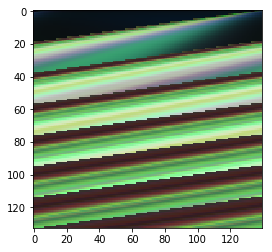

In [19]:
#Showing Flower Results
pyplot.imshow(X=np.array(Y2_pred).reshape(133,140,3)/np.amax(Y2_pred))
pyplot.show()

In [62]:
m = [np.array([[1,2],[1,1]]), np.array([[3,4],[1,2]])]
n = [np.array([2,3]), np.array([4,5])]
#print(np.add(m,n))
print(np.sqrt(m))

[[[1.         1.41421356]
  [1.         1.        ]]

 [[1.73205081 2.        ]
  [1.         1.41421356]]]


0.001